Inspired by kaggle.com/vpkprasanna/basic-text-cleaning-wordcloud-and-n-gram-analysis

In [246]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [247]:
import pandas as pd

data = pd.read_csv("/content/founta_dataset.csv", sep='\t', header=None)
data.head()

,0,1,2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3


In [248]:
data.index.name = 'ID'
data.columns = ['text', 'label', 'votes']
data.head()

,text,label,votes
ID,,,
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3


In [249]:
data.label.value_counts()

normal     53851
abusive    27150
spam       14030
hateful     4965
Name: label, dtype: int64

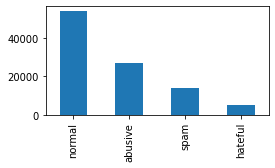

In [250]:
rcParams['figure.figsize'] = 4,2
data.label.value_counts().plot(kind="bar")

In [251]:
tweets = data[data['label']=="hateful"]
print(tweets.shape)

(4965, 3)


In [252]:
tweets_text_len = tweets['text'].str.len()
print("The maximum lenght of string in HATEFUL class is {} words".format(max(tweets_text_len)))

The maximum lenght of string in HATEFUL class is 361 words


In [253]:
#tokenization = splitting up a larger body of text into smaller lines, words 

def tokenize_and_stop_words(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

tweets['text'] = tweets['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


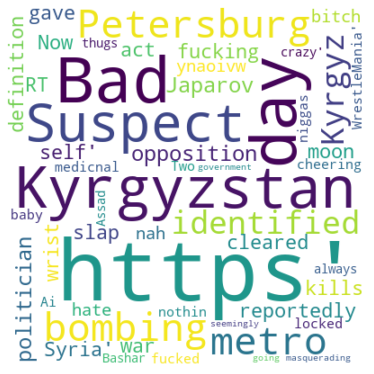

In [254]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = tweets.text.values
generate_word_cloud(tweets_text)

In [255]:
set(data.text)

{'@Jan_Marshall @ChloeCorin @DanMcNeil888 @DavidBallmovie @DavidZenAuthor @DiemBurden TY Jan and all! Have a super fun weekend! &#127803;&#127803;&#127803;',
 'Check out Day Camp Counselor in (#Renton, WA) #Day Camp Counselor #YMCA of Greater Seattle Join our cause and ... https://t.co/I2SndR9hzU',
 'Account Manager, Middlesex, £22k-24k, Call Centre &amp; Customer Service https://t.co/OJ4nLOUjfh #jobs',
 "RT @payconner: my face is a 2 my personality is a 3 i'm a fucking 5 what https://t.co/mZvq4DRh4K",
 'RT @m_millsey: Man, I hate to give exposure to idiot trolls, but this is almost to the level of performance art. https://t.co/dcM26R4xGn',
 'Happy Sabbath from Triadelphia (Maryland) Seventh-day Adventist Church! Gina Wahlen preaching. Watch live:… https://t.co/hHbutRe6ic',
 'VOTE FOR OURE BRAND AMBASSADOR MONIQUE BEST IN MISS JNR TEEN SOUTH AFRICA @ Garden Route Hair… https://t.co/7wsDsDxW8H',
 'RT @EliseuTheMan: @bernardo_siIva @Schweindaddy I CANT IM FUCKING DYING AHAHAHAHAHA',
 'RT

In [256]:
hateful = data[data['label']=="hateful"]
hateful['text'] = hateful['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


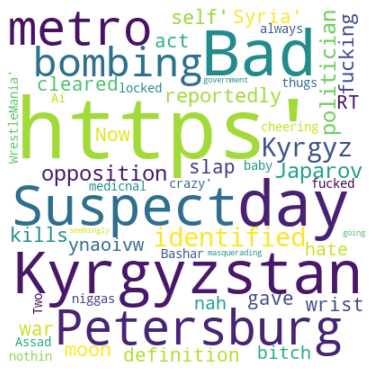

In [257]:
hate_speech = hateful['text'].values
generate_word_cloud(hate_speech)

In [258]:
hateful.head()

,text,label,votes
ID,,,
21,Bad day Kyrgyzstan Suspect Petersburg metro bo...,hateful,2
34,I fucking moon cleared definition act war Now ...,hateful,3
37,RT ynaoivw nah bitch hate u https,hateful,3
71,RT WaysThingsWork I fucking hate people https,hateful,3
106,You looked like complete pathetic idiot tonigh...,hateful,3


In [259]:
normal = data[data['label']=="normal"]
normal['text'] = normal['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


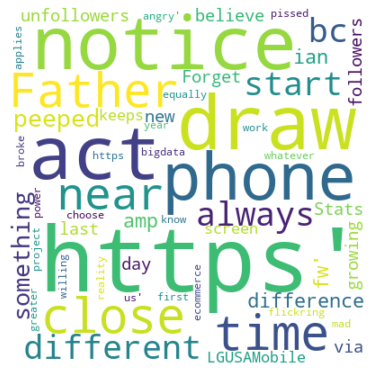

In [260]:
normaltxt = normal['text'].values
generate_word_cloud(normaltxt)

In [261]:
normal.head()

,text,label,votes
ID,,,
2,It time draw close Him Father I draw near alwa...,normal,4
3,notice start act different bc peeped something...,normal,5
4,Forget unfollowers I believe growing new follo...,normal,3
6,Topped group TGP Disc Jam Season Onto HighHors...,normal,3
7,That daily baby aspirin heart might preventing...,normal,5


In [262]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [263]:
word = basic_clean(''.join(str(data['text'].tolist())))

an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles

In [264]:
bigrams_series = (pd.Series(nltk.ngrams(word, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

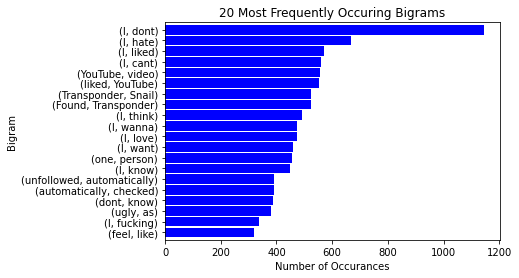

In [265]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')

Text(0.5, 0, 'Number of Occurances')

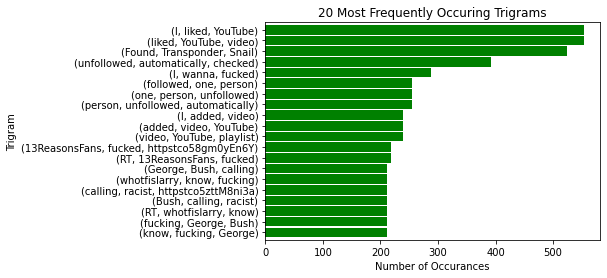

In [266]:
trigrams_series = (pd.Series(nltk.ngrams(word, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Number of Occurances')

In [267]:
#a basic model
x_train, x_test, y_train, y_test = train_test_split(data['text'], data.label,
shuffle=False, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [268]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 81.05%


In [269]:
print(confusion_matrix(y_test, prediction))

[[4891   79  400   58]
 [ 324  229  416   16]
 [ 224   23 9761  776]
 [ 143    4 1327 1329]]


In [270]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

     abusive       0.88      0.90      0.89      5428
     hateful       0.68      0.23      0.35       985
      normal       0.82      0.91      0.86     10784
        spam       0.61      0.47      0.53      2803

    accuracy                           0.81     20000
   macro avg       0.75      0.63      0.66     20000
weighted avg       0.80      0.81      0.80     20000



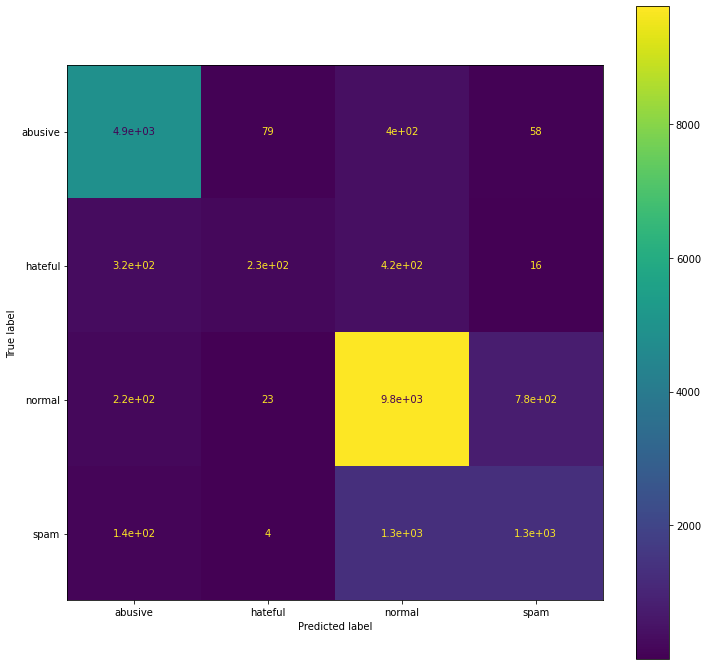

In [271]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(model,x_test,y_test, ax=ax)
plt.show()